In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

In [3]:
# Read the City and Ride Data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the City and Ride Data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city", how="left")

In [6]:
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
city_type = combined_data["type"].unique()
city_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
fare_tax = combined_data["fare"].max()
fare_tax

58.55

In [1]:
#example

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [9]:
# Obtain the x and y coordinates for each of the three city types
#Urban, Surburban, rural

urban_city = combined_data[(combined_data["type"] == "Urban")]
suburban_city = combined_data[(combined_data["type"] == "Suburban")]
rural_city = combined_data[(combined_data["type"] == "Rural")]

In [10]:
#avg, total drivers, total rides by city type

urban_total_rides = urban_city.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_city.groupby(["city"])["fare"].mean()
urban_total_drivers = urban_city.groupby(["city"])["driver_count"].value_counts()


suburban_total_rides = suburban_city.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_city.groupby(["city"])["fare"].mean()
suburban_total_drivers = suburban_city.groupby(["city"])["driver_count"].value_counts()


rural_total_rides = rural_city.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_city.groupby(["city"])["fare"].mean()
rural_total_drivers = rural_city.groupby(["city"])["driver_count"].value_counts()

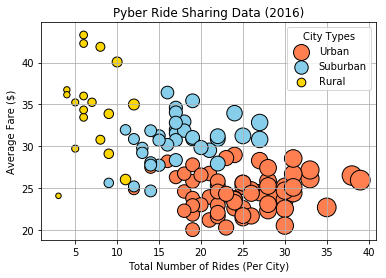

In [11]:
# Build the scatter plots for each city types

plt.scatter(urban_total_rides, urban_avg_fare, urban_total_drivers*10,label="Urban", facecolors="Coral", edgecolors="black")

plt.scatter(suburban_total_rides, suburban_avg_fare, suburban_total_drivers*10,label="Suburban", facecolors="SkyBlue", edgecolors="black")

plt.scatter(rural_total_rides, rural_avg_fare, rural_total_drivers*10,label="Rural", facecolors="Gold", edgecolors="black")


# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid()


# Create a legend
plt.legend(loc= "upper right", title="City Types")

# Incorporate a text label regarding circle size


In [12]:
# Save Figure
plt.savefig("Pyber Bubble Plot - JB.png")

<Figure size 432x288 with 0 Axes>

In [13]:
# Show plot
plt.show()

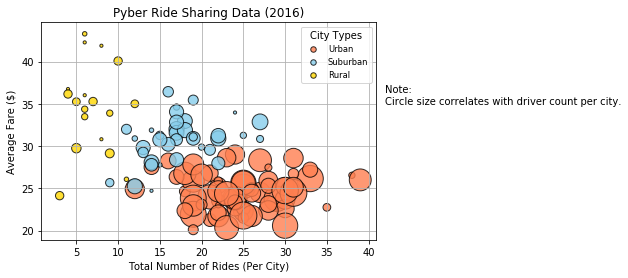

In [3]:
#example

## Total Fares by City Type

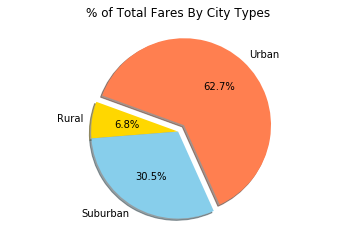

In [14]:
# Calculate Type Percents
total_fare = combined_data.groupby(["type"])["fare"].sum()

labels = ["Rural", "Suburban", "Urban"]

colors = ["Gold", "SkyBlue", "Coral"]

explode = (0, 0, 0.1)

plt.title('% of Total Fares By City Types')

plt.axis("equal")

# Build Pie Chart
plt.pie(total_fare, labels = labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=160)


plt.show()

In [15]:
# Save Figure
plt.savefig("Pyber Pie Chart 1 - JB.png")

<Figure size 432x288 with 0 Axes>

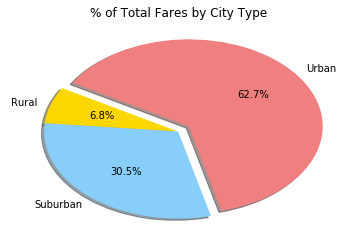

In [4]:
# Show Figure (example)
plt.show()

## Total Rides by City Type

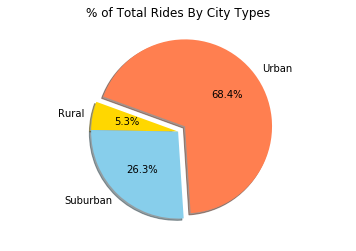

<Figure size 432x288 with 0 Axes>

In [26]:
# Calculate Ride Percents

total_rides = combined_data.groupby(["type"])["ride_id"].count()

labels = ["Rural", "Suburban", "Urban"]

colors = ["Gold", "SkyBlue", "Coral"]

explode = (0, 0, 0.1)

plt.title('% of Total Rides By City Types')

plt.axis("equal")

# Build Pie Chart

plt.pie(total_rides, labels = labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=160)

plt.show()
# Save Figure
plt.savefig("Pyber Pie Chart 2 - JB.png")

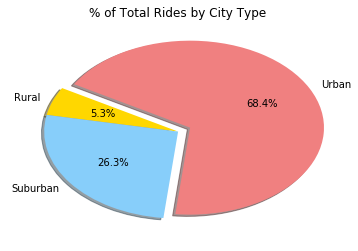

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

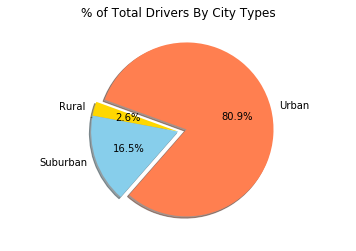

<Figure size 432x288 with 0 Axes>

In [32]:
# Calculate Driver Percents
total_drivers = city_data.groupby(["type"])["driver_count"].sum()

labels = ["Rural", "Suburban", "Urban"]

colors = ["Gold", "SkyBlue", "Coral"]

explode = (0, 0, 0.1)

plt.title('% of Total Drivers By City Types')

plt.axis("equal")

# Build Pie Charts
plt.pie(total_drivers, labels = labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=160)

plt.show()

# Save Figure
plt.savefig("Pyber Pie Chart 3 - JB.png")

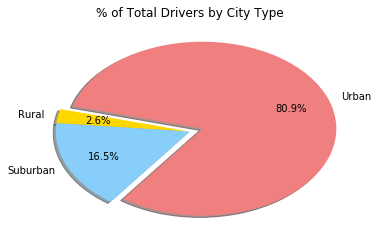

In [6]:
# Show Figure
plt.show()

In [ ]:
# TREND ANALYSIS (include a written description of three observable trends based on the data)

#Based on the data analysis of the bubble plot by ride sharing data, total fares, total rides, and total drivers by city type.
# There are three observable trends worth noting:
# 1) While the number of rides is greater in urban cities than rural cities, the fare for rural cities sometimes can be two to three times higher.
# urban cities still tend to be more profitable due to the higher volume of rides and drivers. 

# 2) Surburban cities are the ideal type of city to target for expansion and growth because
# 

